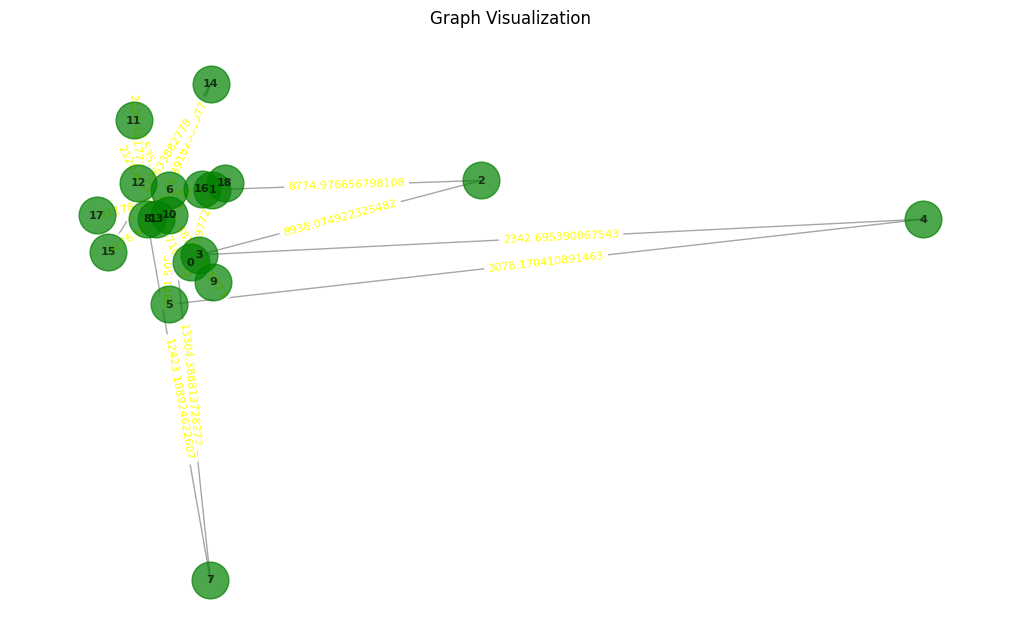

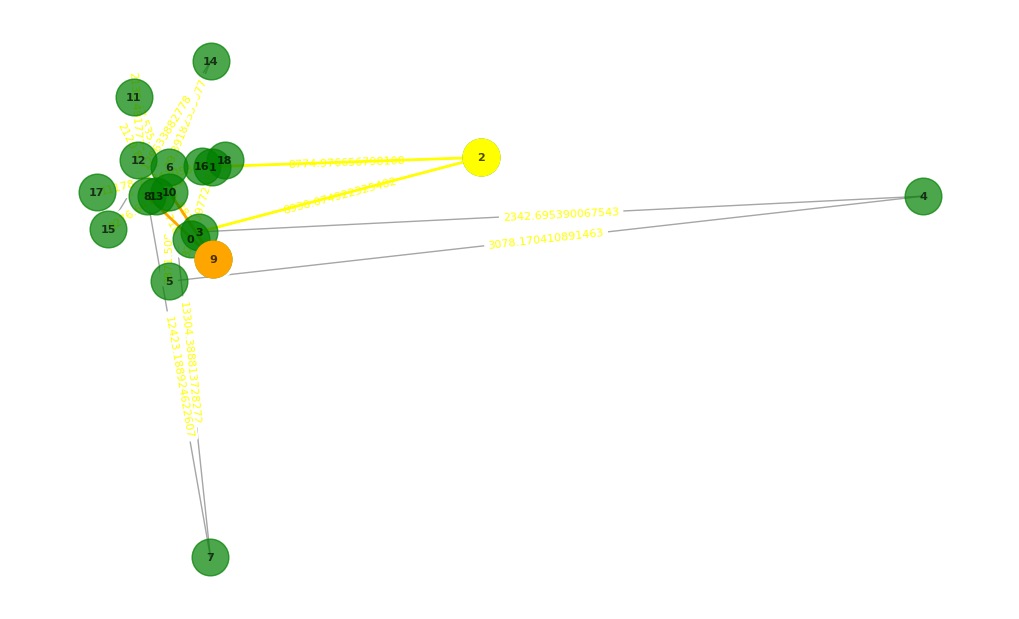

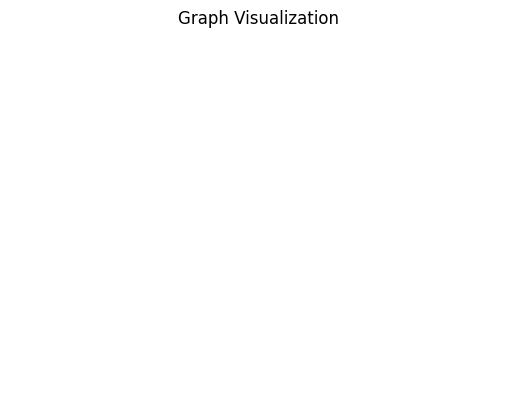

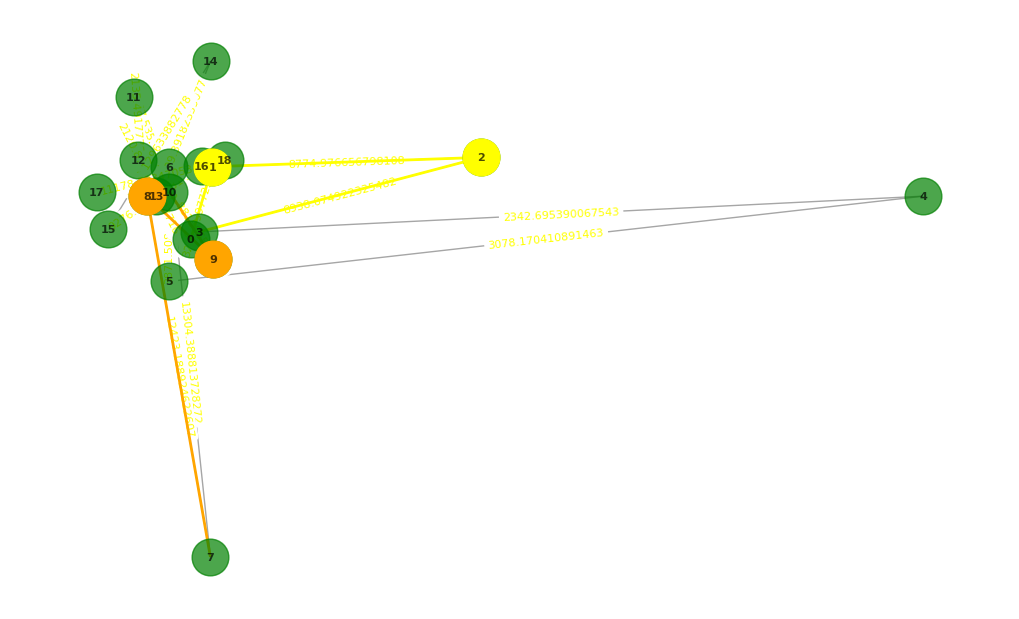

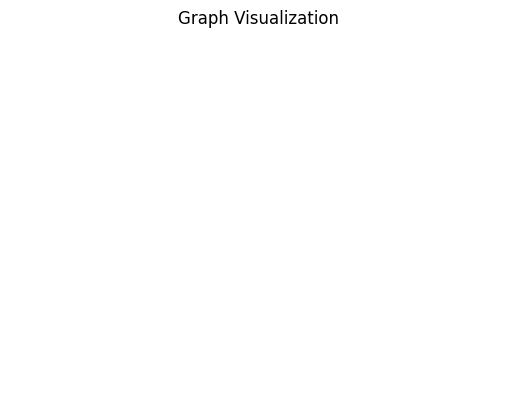

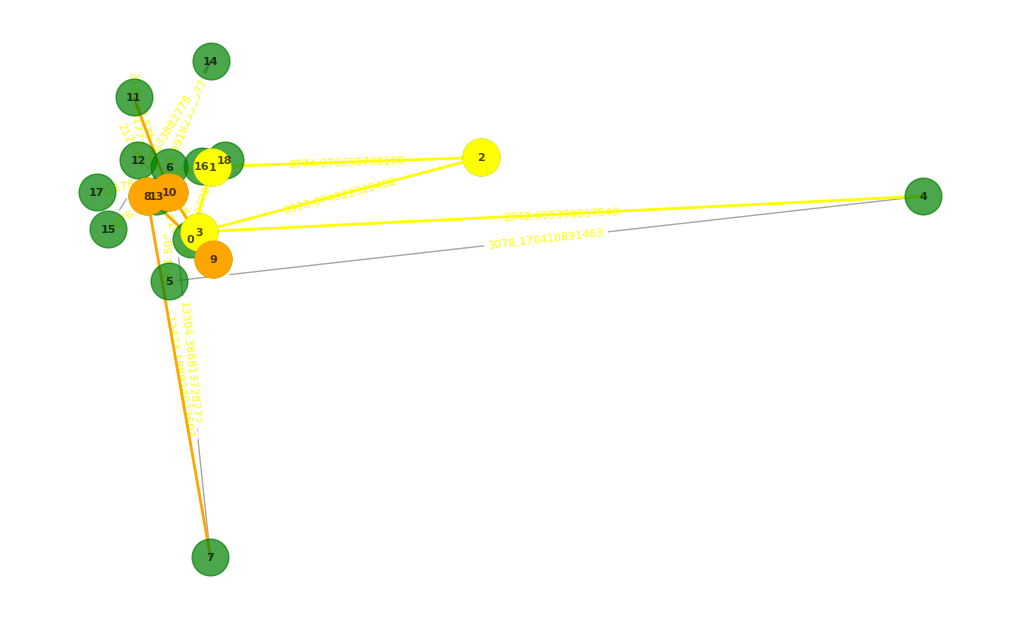

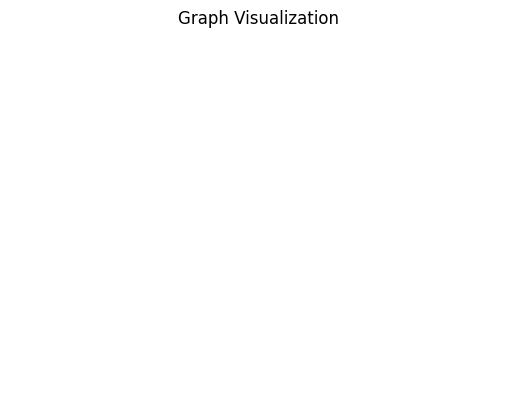

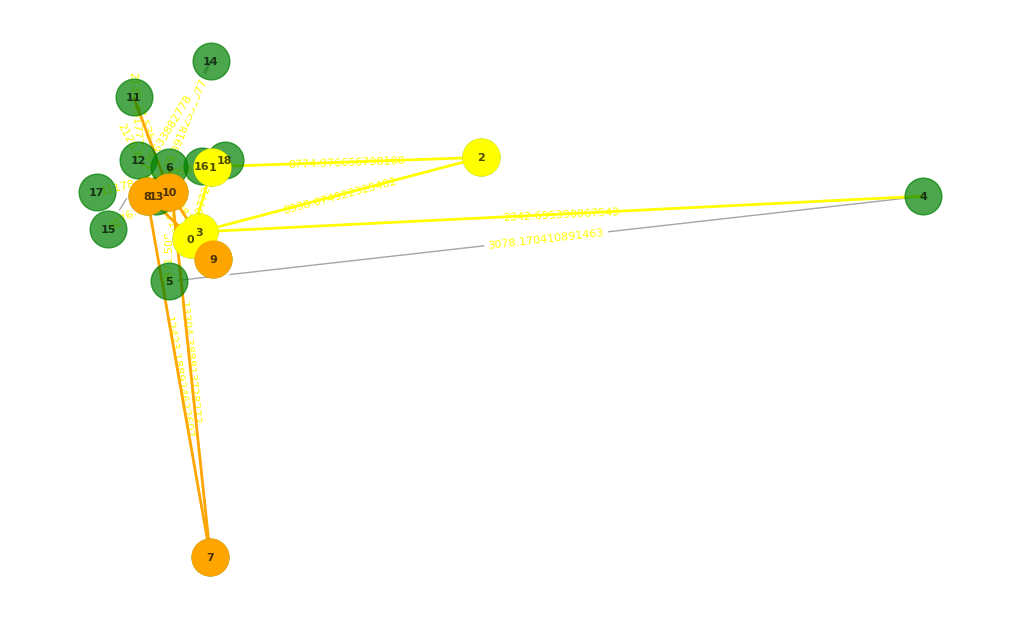

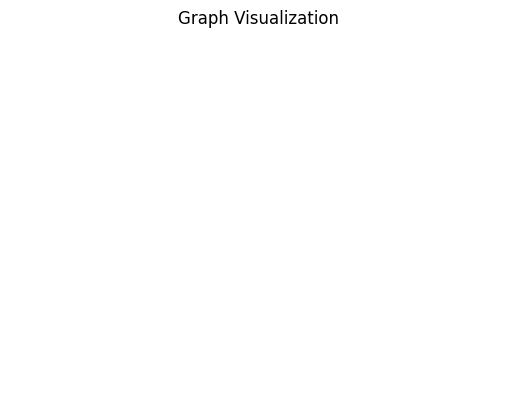

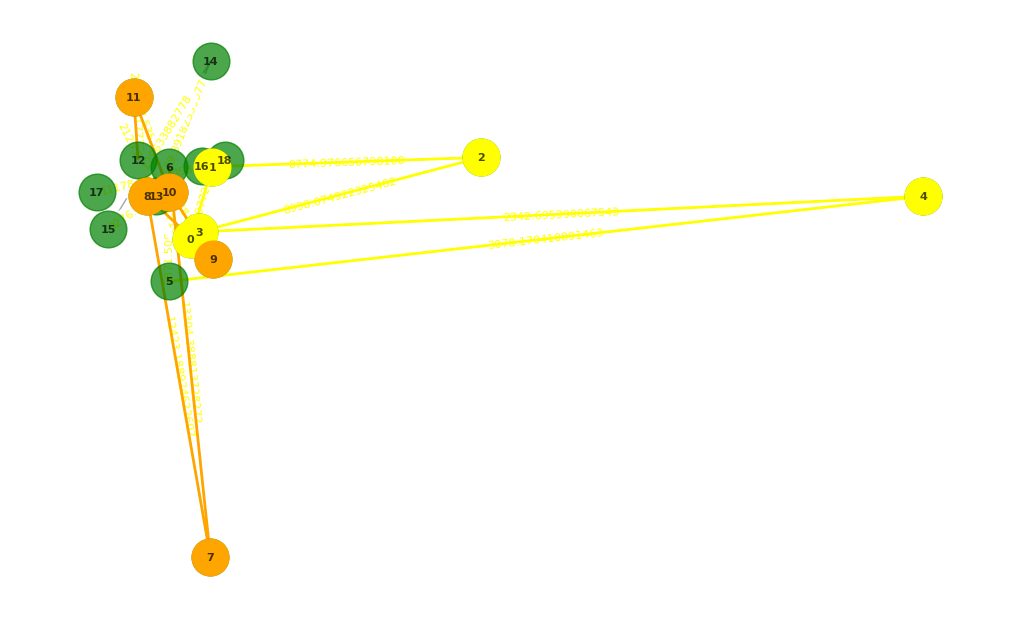

Total Cost: 78574.66 km
Total Time: 0.705497 seconds
Shortest Path: [2, 3, 4, 5, 7, 8, 9]


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
from collections import deque
import time

file_name = "graph.txt"

with open(file_name, 'r') as file:
    data = file.readlines()

points = []
for line in data:
    components = line.strip().split(',')
    point = (float(components[0]), float(components[1]))
    points.append(point)

G = nx.Graph()
G.add_nodes_from(range(len(points)))
for i in range(len(points) - 1):
    distance_km = geodesic(points[i], points[i + 1]).kilometers
    G.add_edge(i, i + 1, weight=distance_km)

pos = {i: (points[i][1], points[i][0]) for i in range(len(points))}
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='green', font_size=8,
        edge_color='gray', alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='yellow', font_size=8)

start_node = 2
end_node = 9

highlighted_nodes_forward = []
highlighted_nodes_backward = []
highlighted_edges_forward = []
highlighted_edges_backward = []

queue_forward = deque([(start_node, [start_node])])
queue_backward = deque([(end_node, [end_node])])
visited_forward = set()
visited_backward = set()
visited_forward.add(start_node)
visited_backward.add(end_node)

intersection_node = None
start_time = time.time()

while queue_forward and queue_backward:
    current_node_forward, path_forward = queue_forward.popleft()
    highlighted_nodes_forward.append(current_node_forward)

    for neighbor in G.neighbors(current_node_forward):
        if neighbor not in visited_forward:
            queue_forward.append((neighbor, path_forward + [neighbor]))
            visited_forward.add(neighbor)
            highlighted_edges_forward.append((current_node_forward, neighbor))

    current_node_backward, path_backward = queue_backward.popleft()
    highlighted_nodes_backward.append(current_node_backward)

    for neighbor in G.neighbors(current_node_backward):
        if neighbor not in visited_backward:
            queue_backward.append((neighbor, [neighbor] + path_backward))
            visited_backward.add(neighbor)
            highlighted_edges_backward.append((current_node_backward, neighbor))

    intersection = visited_forward.intersection(visited_backward)
    if intersection:
        intersection_node = intersection.pop()
        highlighted_nodes_forward.append(intersection_node)
        break
    plt.axis('off')
    plt.title("Graph Visualization")
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='green', font_size=8,
            edge_color='gray', alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='yellow', font_size=8)
    nx.draw_networkx_nodes(G, pos, nodelist=highlighted_nodes_forward, node_color='yellow', node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges_forward, edge_color='yellow', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=highlighted_nodes_backward, node_color='orange', node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges_backward, edge_color='orange', width=2)
    plt.show()
    time.sleep(0)

total_cost_forward = sum(G[current_node_forward][neighbor]['weight'] for current_node_forward, neighbor in highlighted_edges_forward)
total_cost_backward = sum(G[current_node_backward][neighbor]['weight'] for current_node_backward, neighbor in highlighted_edges_backward)
total_cost = total_cost_forward + total_cost_backward
execution_time = time.time() - start_time

print(f"Total Cost: {total_cost:.2f} km")
print(f"Total Time: {execution_time:.6f} seconds")

if intersection_node is not None:
    shortest_path_nodes = path_forward + path_backward[1:]
    print(f"Shortest Path: {shortest_path_nodes}")
else:
    print("No path found between the start and target nodes")




plt.show()

